<h1>Descriptive Statistics for tweetDate & authorLocation</h1>

<h3>Packages & Options</h3>

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)

In [2]:
import matplotlib

In [3]:
import dateutil

In [73]:
import re

<h3>Import Data</h3>

In [4]:
df = pd.read_pickle('../20190327_AM_Descriptives')

In [5]:
df[0:1]

,authorFollower,authorFriend,authorLang,authorLocation,authorPicture,authorScreen,authorScreen_original,tweetID,tweetID_original,tweetMethod,tweetTimeDate,tweetURL,authorLang_new,authorLocation_new,authorPicture_new,tweetMethod_new,tweetTimeDate_new
0,197,579,en,NaN,http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png,darleneclarke5,NaN,1.10272e+18,nan,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Mon Mar 04 23:59:47 +0000 2019,http://twitter.com/darleneclarke5/statuses/1102720324875894785,en,NaN,http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",2019-03-04 23:59:47+00:00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123524 entries, 0 to 123523
Data columns (total 17 columns):
authorFollower           123524 non-null int64
authorFriend             123524 non-null int64
authorLang               123524 non-null object
authorLocation           85206 non-null object
authorPicture            123524 non-null object
authorScreen             123524 non-null object
authorScreen_original    9666 non-null object
tweetID                  123524 non-null object
tweetID_original         123524 non-null object
tweetMethod              123524 non-null object
tweetTimeDate            123524 non-null object
tweetURL                 123524 non-null object
authorLang_new           123524 non-null category
authorLocation_new       85206 non-null category
authorPicture_new        123524 non-null category
tweetMethod_new          123524 non-null category
tweetTimeDate_new        123524 non-null datetime64[ns, tzutc()]
dtypes: category(4), datetime64[ns, tzutc()](1), int64

<h3>Recode authorLocation</h3>

In [7]:
df['authorLocation'].value_counts()[0:15]

United States              3475
USA                        1187
California, USA            1027
Texas, USA                 932 
Florida, USA               857 
Washington, DC             680 
London                     652 
London, England            648 
Canada                     561 
United Kingdom             530 
England, United Kingdom    516 
Los Angeles, CA            476 
New York, NY               475 
Australia                  391 
Texas                      382 
Name: authorLocation, dtype: int64

I would like to recode the data into these levels:
<ul><li>Group 1: USA-Northeast</li>
    <li>Group 2: USA-Southeast</li>
    <li>Group 3: USA-Midwest</li>
    <li>Group 4: USA-Southwest</li>
    <li>Group 5: USA-Coastal West</li>
    <li>Group 6: USA-Mountain West</li>
    <li>Group 3: Non USA</li></ul>

Here is a csv mapping state names and abbreviations to regions.

In [8]:
usRegions = pd.read_csv('https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv')

In [9]:
usRegions.head()

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific


A bit of data prep:

In [10]:
usRegions.rename(columns={'State Code':'StateCode'}, inplace=True)

In [11]:
usRegions = usRegions.drop(['Division'], axis=1)

In [12]:
usRegions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
State        51 non-null object
StateCode    51 non-null object
Region       51 non-null object
dtypes: object(3)
memory usage: 1.3+ KB


<h3>The approach</h3>

In [14]:
#Here's what I'd like to do:
#For each row in usRegions:
    #Attempt to match (using regex) usRegions[State] in df['authorLocation].
        #If True, replace df['authorLocation_new] with usRegions['Region'].
    #Attempt to match using regex the StateCode value in df['authorLocation].
        #If True, replace df['authorLocation_new] with usRegions['Region'].
#Print value counts for df['authorLocation_new]

<h3>Test Data</h3>

In [15]:
df1 = usRegions[0:5]
df1

,State,StateCode,Region
0,Alaska,AK,West
1,Alabama,AL,South
2,Arkansas,AR,South
3,Arizona,AZ,West
4,California,CA,West


In [79]:
df2 = df[{'authorLocation_new','authorLocation'}][10:20]
df2

,authorLocation,authorLocation_new
10,NaN,NaN
11,"California, USA","California, USA"
12,"Florida, USA","Florida, USA"
13,NaN,NaN
14,NaN,NaN
15,NaN,NaN
16,Neo Swabia,Neo Swabia
17,NaN,NaN
18,TX,TX
19,Cities of Corruption,Cities of Corruption


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
State        5 non-null object
StateCode    5 non-null object
Region       5 non-null object
dtypes: object(3)
memory usage: 200.0+ bytes


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 10 to 49
Data columns (total 2 columns):
authorLocation        24 non-null object
authorLocation_new    24 non-null category
dtypes: category(1), object(1)
memory usage: 205.4+ KB


Not making any progress, so I will attempt the simpler approach, which recodes authorLocation simply into US or not-US.

In [82]:
df['authorLocation'].value_counts()[0:5]

United States      3475
USA                1187
California, USA    1027
Texas, USA         932 
Florida, USA       857 
Name: authorLocation, dtype: int64

In [36]:
df['authorLocation'].str.contains('.*USA.*', regex=True).value_counts()

False    73056
True     12150
Name: authorLocation, dtype: int64

In [37]:
df['authorLocation_usOther'] = df['authorLocation']

In [38]:
df['authorLocation_usOther'] = df['authorLocation_usOther'].replace(regex=r'.*USA.*', value='United States')

In [39]:
df['authorLocation_usOther'].value_counts()[0:20]

United States              15625
Washington, DC             680  
London                     652  
London, England            648  
Canada                     561  
United Kingdom             530  
England, United Kingdom    516  
Los Angeles, CA            476  
New York, NY               475  
Australia                  391  
Texas                      382  
UK                         375  
France                     339  
Chicago, IL                337  
Earth                      298  
Austin, TX                 289  
California                 243  
Paris, France              225  
Houston, TX                222  
New York                   215  
Name: authorLocation_usOther, dtype: int64

Also not making any progress on trying to match and recode state abbreviation mentions. Sunyam / Stefan: Any suggestions? Ideally, we will recode any authorLocations that mention a US state or state abbreviation to the appropriate region, according to the usRegions dataframe.

<h3>Create new date-only variable</h3>

In [42]:
df['tweetTimeDate'].value_counts()[0:1]

Tue Feb 26 22:55:03 +0000 2019    29
Name: tweetTimeDate, dtype: int64

In [43]:
df['tweetDate'] = df['tweetTimeDate'].replace(regex=r'\s\d{2}:.*:\d{2}\s.{5}', value='')

In [44]:
df['tweetDate'].value_counts()[0:1]

Thu Feb 28 2019    2913
Name: tweetDate, dtype: int64

In [45]:
df['tweetDate_new'] = df['tweetDate'].apply(dateutil.parser.parse, dayfirst=True)

In [46]:
df['tweetDate_new'][0:1]

0   2019-03-04
Name: tweetDate_new, dtype: datetime64[ns]

<h3>Summary Statistics</h3>

To Do: Stats for authorLocation

In [66]:
df['tweetDate_new'].value_counts()

2019-02-28    2913
2019-01-26    2910
2019-02-22    2909
2019-02-10    2906
2019-02-04    2905
2019-02-08    2902
2019-02-11    2901
2019-01-28    2900
2019-03-01    2897
2019-02-23    2896
2019-02-09    2895
2019-01-27    2891
2019-03-04    2891
2019-03-02    2889
2019-02-18    2885
2019-02-26    2884
2019-01-25    2884
2019-03-03    2882
2019-02-17    2881
2019-02-05    2880
2019-02-21    2878
2019-02-12    2877
2019-02-24    2876
2019-02-25    2876
2019-02-19    2872
2019-01-31    2870
2019-01-30    2866
2019-02-27    2866
2019-01-23    2863
2019-02-15    2863
2019-02-03    2862
2019-02-20    2859
2019-01-22    2857
2019-02-14    2855
2019-01-24    2854
2019-02-06    2853
2019-02-02    2851
2019-02-07    2848
2019-01-21    2848
2019-01-29    2841
2019-02-01    2825
2019-02-16    2786
2019-02-13    2777
Name: tweetDate_new, dtype: int64

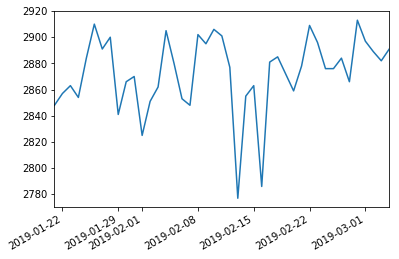

In [65]:
df['tweetDate_new'].value_counts().plot()

When we group tweets by day, we no longer see the Feb 26 spike, although a nearby date does have the greatest number of tweets. Still, it might be worth examining the late-hour tweets on Feb 26 that generated the spike when the time is included.

<h3>Notes and code for later use</h3>

In [67]:
states = usRegions['State'].tolist()

In [68]:
stateCodes = usRegions['StateCode'].tolist()

In [69]:
regions = usRegions['Region'].tolist()

In [78]:
df['authorLocation'].str.contains('.*' + str(regions) + r'.*', regex=True).value_counts()

True     83549
False    1657 
Name: authorLocation, dtype: int64